<a href="https://colab.research.google.com/github/me-sajal/Satellite-Image-Classification/blob/main/satelliteimageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset_url = "https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification"


In [ ]:
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sajalrokka
Your Kaggle Key: ··········


100%|██████████| 21.8M/21.8M [00:00<00:00, 79.6MB/s]


This code installs the "opendatasets" Python library using pip and then uses it to download a dataset from Kaggle. The dataset being downloaded is named "satellite-image-classification" and is available at the specified Kaggle URL. The "opendatasets" library simplifies the process of downloading datasets from various sources, including Kaggle, for data analysis and machine learning projects.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, SpatialDropout2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam



This code imports necessary libraries for building and training a convolutional neural network (CNN) using TensorFlow and Keras for image classification.

1. `import numpy as np`: Imports the NumPy library and aliases it as "np," which is commonly used for numerical operations.

2. `import tensorflow as tf`: Imports TensorFlow, a popular deep learning framework, and aliases it as "tf."

3. `from tensorflow.keras.models import Sequential`: Imports the Sequential class from Keras, which allows you to create a neural network model in a sequential manner.

4. `from tensorflow.keras.layers import ...`: Imports various layers like Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, and SpatialDropout2D. These layers are building blocks for constructing the neural network.

5. `import matplotlib.pyplot as plt`: Imports Matplotlib, a library for creating visualizations, and aliases it as "plt."

6. `import matplotlib.image as mpimg`: Imports a module for working with images using Matplotlib.

7. `from tensorflow.keras.optimizers import Adam`: Imports the Adam optimizer, which is often used for training neural networks.

The code sets up the environment for building a CNN model for image classification, but it doesn't provide the actual model architecture or training data. The missing parts would include defining the model layers, loading and preprocessing image data, compiling the model with a loss function and optimizer, and training the model on the data.

### List Dataset

In [ ]:
train_dataset = "/content/satellite-image-classification/data"

import os

class_names = sorted(os.listdir(train_dataset))
print("Classes:", class_names)

class_num = len(class_names)
print("Number of classes:", class_num)

for label in class_names:
    print(label, len(os.listdir(train_dataset+'/'+label)))


Classes: ['cloudy', 'desert', 'green_area', 'water']
Number of classes: 4
cloudy 1500
desert 1131
green_area 1500
water 1500


This code is used to examine a dataset of satellite images for image classification.

1. It defines the path to the training dataset containing satellite images, assumed to be located at "/content/satellite-image-classification/data".

2. It imports the necessary 'os' module to work with file and directory operations.

3. It lists and sorts the subdirectories in the training dataset, which represent different classes or categories of satellite images.

4. It prints the names of the classes found in the dataset.

5. It calculates and prints the total number of classes (the number of subdirectories).

6. It iterates through each class (subdirectory) and prints the class name along with the number of images in that class (subdirectory).

Overall, this code provides an overview of the dataset's structure, including the names of classes and the number of images in each class.

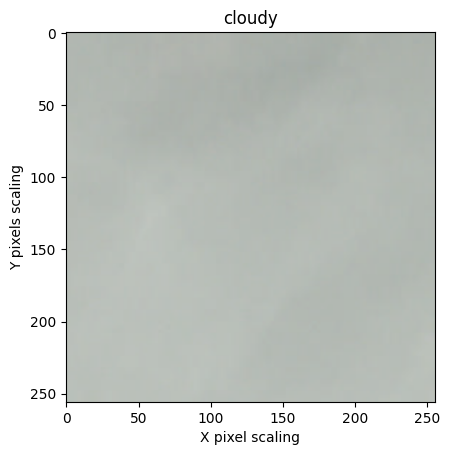

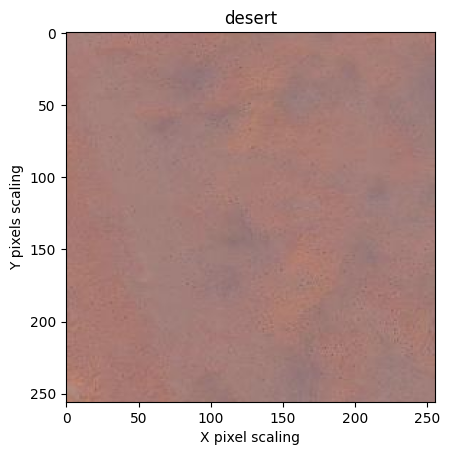

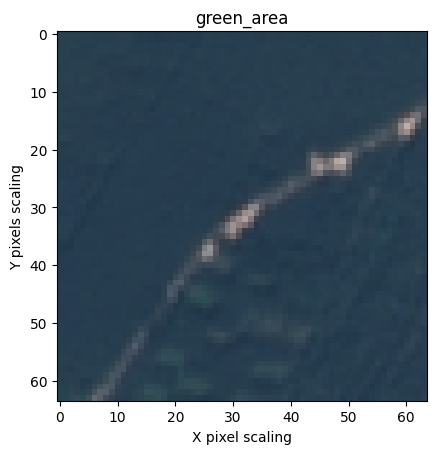

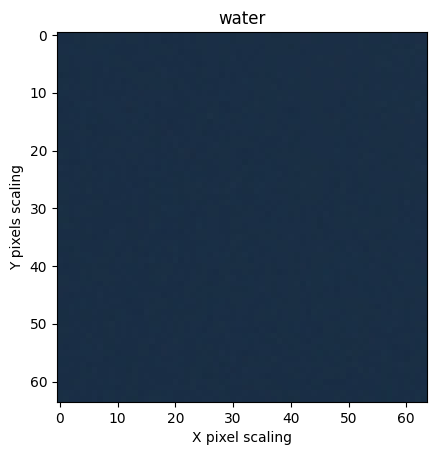

In [ ]:
for label in class_names:
    path = os.listdir(train_dataset + '/' + label)
    img = train_dataset + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

This code appears to be a Python script that iterates through a list of class names, presumably representing different categories or labels.

1. It constructs a path by combining the `train_dataset` directory with the current class label.
2. It lists the files in that directory.
3. It selects the second file in the list (assuming 0-based indexing), which is assigned to the variable `img`.
4. It sets a title for the plot using the current class label.
5. It adds labels for the X and Y axes.
6. It reads and loads an image from the `img` file using `mpimg.imread()`.
7. It displays the image using `plt.imshow()` and then shows the image using `plt.show()`.

This code snippet seems to be part of a larger program for visualizing images associated with different classes in a machine learning dataset, but it only shows one image from each class (the second image in each class's directory).

### Load Dataset

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                         batch_size = 32,
                                                         image_size=(64, 64),
                                                         subset = 'training',
                                                         validation_split= 0.2,
                                                         seed = 123
                                                         )



Found 5631 files belonging to 4 classes.
Using 4505 files for training.


This code uses TensorFlow (tf) to create a training dataset from a directory of image files.

1. `tf.keras.utils.image_dataset_from_directory`: This is a function from TensorFlow's Keras API that is used to create a dataset of images from a directory.

2. `train_dataset`: This should be the path to the directory containing your training images.

3. `batch_size`: It sets the number of images to include in each batch of the dataset. In this case, each batch will contain 32 images.

4. `image_size`: It specifies the size to which the images will be resized. In this case, each image will be resized to 64x64 pixels.

5. `subset`: This parameter is set to 'training', indicating that the dataset being created is for training purposes.

6. `validation_split`: It determines the fraction of the dataset that will be used for validation. In this case, 20% of the data will be used for validation, and the remaining 80% will be used for training.

7. `seed`: This sets the random seed for reproducibility. The same seed value (123 in this case) will result in the same random splitting of the data each time you run this code.

In summary, this code prepares a training dataset of images by loading them from a directory, resizing them to 64x64 pixels, and splitting them into training and validation sets. The training set will contain 80% of the data, and each batch will consist of 32 images.

In [ ]:
validation_data = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                         batch_size = 16,
                                                         image_size=(64, 64),
                                                         validation_split= 0.2,
                                                         subset='validation',
                                                         seed = 123
                                                         )

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


This code uses TensorFlow (tf) to create a validation dataset from a directory of images.
1. `tf.keras.utils.image_dataset_from_directory`: This function creates a dataset from image files in a directory.

2. `train_dataset`: This is the directory containing the image data.

3. `batch_size`: It specifies how many images are processed in each batch during training or validation. In this case, it's set to 16.

4. `image_size`: This sets the size to which the images are resized. In this case, images are resized to 64x64 pixels.

5. `validation_split`: It determines the portion of the dataset used for validation. Here, 20% of the data is used for validation.

6. `subset`: This parameter specifies which subset of the dataset to create. In this case, it's set to 'validation', so it creates a validation dataset.

7. `seed`: It sets the random seed for data shuffling and splitting to ensure reproducibility. It's set to 123 for consistency in results.

### Create Model (CNN)

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
# Build the model
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers with dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


This code defines a convolutional neural network (CNN) model using TensorFlow and Keras for image classification.

1. It imports the necessary layers and libraries from TensorFlow for building neural networks.

2. The model is initialized as a sequential model, which means layers are added sequentially.

3. The input images are rescaled by dividing their pixel values by 255 to normalize them.

4. Three convolutional layers are added with different filter sizes (32, 64, and 128), ReLU activation functions, and batch normalization. Each convolutional layer is followed by a max-pooling layer to downsample the feature maps.

5. After the convolutional layers, a flatten layer is added to transform the 2D feature maps into a 1D vector.

6. Two fully connected (dense) layers are added with ReLU activation functions and dropout regularization to prevent overfitting.

7. Finally, an output layer with 4 units (assuming it's a multi-class classification task) and softmax activation is added.

8. The model is compiled with the Adam optimizer, a learning rate of 0.0001, categorical cross-entropy loss (common for multi-class classification), and accuracy as the evaluation metric.

This code defines a CNN architecture commonly used for image classification tasks, and you would typically train it on a dataset with labeled images to perform tasks like image classification.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


1. `model.compile`: This is a function used to configure the training process for a machine learning model.
2. `optimizer=Adam(learning_rate=0.0001)`: It specifies the optimization algorithm to be used during training. Here, it's using the Adam optimizer with a learning rate of 0.0001.
3. `loss='sparse_categorical_crossentropy'`: This sets the loss function, which is a measure of how well the model is performing. In this case, it's using the sparse categorical cross-entropy loss, typically used for classification tasks with integer-encoded class labels.
4. `metrics=['accuracy']`: This defines the evaluation metric(s) used to monitor the model's performance during training. Here, it's using accuracy, which measures how often the model's predictions match the true labels.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20,
                    callbacks=[early_stopping]
                    )

Epoch 1/20
141/141 [==============================] - 23s 30ms/step - loss: 0.3788 - accuracy: 0.8752 - val_loss: 2.0734 - val_accuracy: 0.2638
Epoch 2/20
141/141 [==============================] - 3s 21ms/step - loss: 0.1562 - accuracy: 0.9401 - val_loss: 3.2717 - val_accuracy: 0.3171
Epoch 3/20
141/141 [==============================] - 4s 31ms/step - loss: 0.1231 - accuracy: 0.9620 - val_loss: 2.8478 - val_accuracy: 0.7167
Epoch 4/20
141/141 [==============================] - 3s 22ms/step - loss: 0.0844 - accuracy: 0.9725 - val_loss: 1.1427 - val_accuracy: 0.7860
Epoch 5/20
141/141 [==============================] - 3s 22ms/step - loss: 0.0585 - accuracy: 0.9796 - val_loss: 0.3292 - val_accuracy: 0.9130
Epoch 6/20
141/141 [==============================] - 3s 24ms/step - loss: 0.0710 - accuracy: 0.9765 - val_loss: 0.0250 - val_accuracy: 0.9911
Epoch 7/20
141/141 [==============================] - 3s 22ms/step - loss: 0.0704 - accuracy: 0.9776 - val_loss: 0.2538 - val_accuracy: 0.919

This code is for training a neural network using TensorFlow's Keras API with early stopping.

1. It imports the EarlyStopping callback from TensorFlow's Keras callbacks module.

2. It creates an EarlyStopping callback object named "early_stopping" with the following settings:
   - It monitors the validation loss ("val_loss").
   - It allows training to continue for up to 3 additional epochs after validation loss stops improving.
   - It restores the best weights of the model when training finishes.

3. The model is trained using the `model.fit()` method:
   - It uses the "train_data" dataset for training.
   - It uses the "validation_data" dataset for validation during training.
   - Training is performed for 20 epochs.
   - The "early_stopping" callback is used during training to monitor and stop training based on validation loss.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        2

The code `model.summary()` is typically used in machine learning or deep learning frameworks like TensorFlow or Keras to display a concise summary of the architecture and parameters of a neural network model. It provides information about the layers in the model, their shapes, and the number of trainable parameters. This summary helps you quickly understand the structure of your model and check for any issues such as unexpected layer sizes or parameter counts.

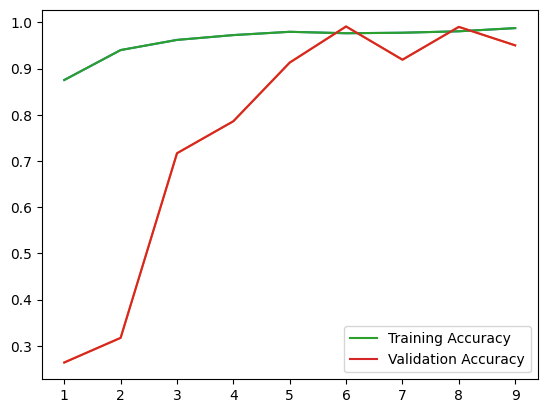

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy)
plt.plot(val_accuracy)

# Plotting the data
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')


# Adding labels or indices to the x-axis ticks
plt.xticks(range(len(train_accuracy)), labels=range(1, len(train_accuracy)+1))

# Adding a legend to the graph
plt.legend()

# Displaying the graph
plt.show()

This code is plotting the training and validation accuracy of a machine learning model during training.

1. Retrieves the training and validation accuracy values from a `history` object, which likely contains the training history of a neural network.

2. Plots the training accuracy values as a line on a graph.

3. Plots the validation accuracy values as another line on the same graph.

4. Adds labels or indices to the x-axis ticks, corresponding to the training epochs.

5. Adds a legend to the graph to distinguish between training and validation accuracy.

6. Finally, it displays the graph using Matplotlib, allowing you to visualize how the model's accuracy changes over the training epochs.

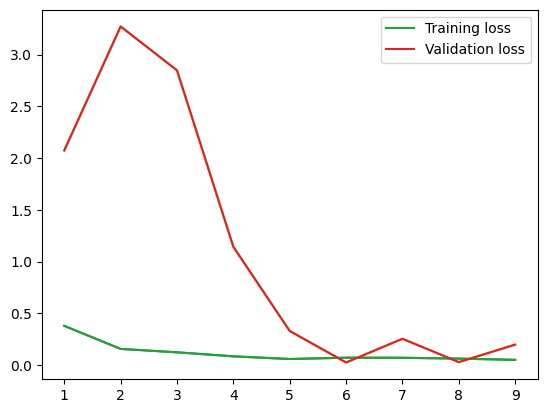

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)

# Plotting the data
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')


# Adding labels or indices to the x-axis ticks
plt.xticks(range(len(train_loss)), labels=range(1, len(train_loss)+1))

# Adding a legend to the graph
plt.legend()

# Displaying the graph
plt.show()

This code is for plotting training and validation loss values during a machine learning model's training process.

1. `train_loss` and `val_loss` are lists containing the training and validation loss values, respectively, extracted from a `history` object. This object likely contains information about the model's training history.

2. `plt.plot(train_loss)` and `plt.plot(val_loss)` are used to plot the training and validation loss values as separate lines on a graph.

3. `plt.plot(train_loss, label='Training loss')` and `plt.plot(val_loss, label='Validation loss')` plot the training and validation loss values with labels on the graph.

4. `plt.xticks(range(len(train_loss)), labels=range(1, len(train_loss)+1))` customizes the x-axis ticks by setting them to integers from 1 to the length of the `train_loss` list.

5. `plt.legend()` adds a legend to the graph to distinguish between the training and validation loss curves.

6. Finally, `plt.show()` displays the graph containing the training and validation loss curves.

In summary, this code creates a graph that visually represents the training and validation loss of a machine learning model over time, making it easier to assess the model's performance during training.

### Evaluation

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(train_data)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

141/141 [==============================] - 2s 16ms/step - loss: 0.0213 - accuracy: 0.9927
Test Loss: 0.02126030996441841
Test Accuracy: 0.9926748275756836


This code is evaluating a machine learning model on a test dataset. It calculates the loss and accuracy of the model's predictions on the test data and then prints these evaluation results. The "model" variable likely refers to a pre-trained machine learning model, and "train_data" probably contains the test dataset.